Classification Accuracy: 0.3333333333333333
R-squared score: 0.483270382466946


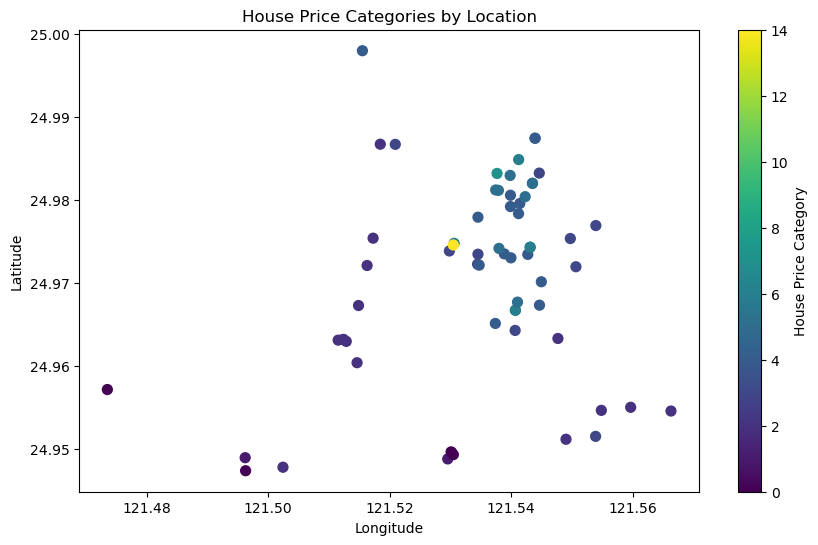

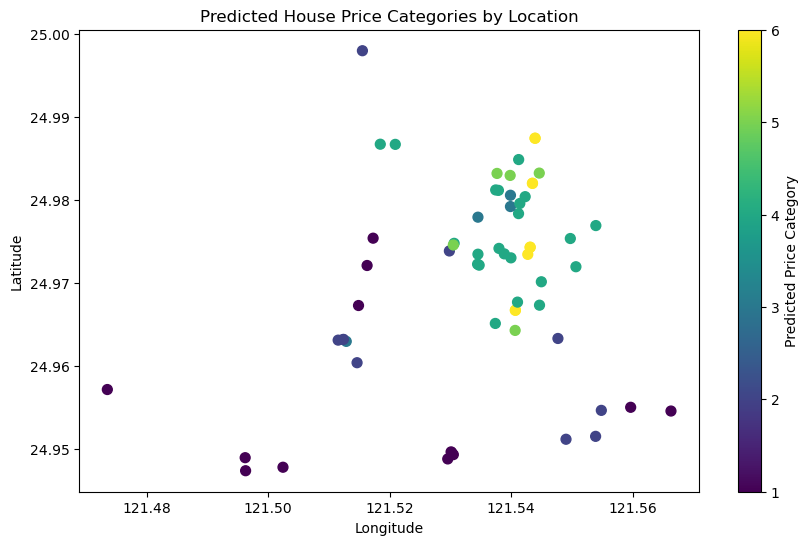

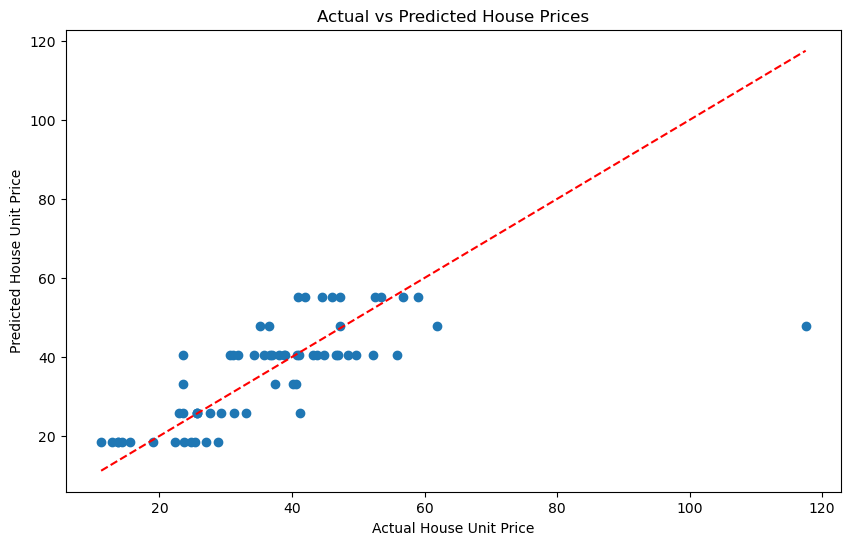

In [2]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

%matplotlib inline

# Step 2: Load Dataset
data = pd.read_csv(r'C:\Users\user\Desktop\data science\house_prices.csv')
data.head()

# Step 3: Preprocess Data
# Create 15 bins for house prices
data['Class'] = pd.cut(data['House unit price'], bins=15)
data['Class id'] = data['Class'].cat.codes

# Prepare features and target
X = data
y = data['Class id']

# Step 4: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Step 5: Train K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train[['Latitude', 'Longitude']], y_train)

# Predict on test set
y_pred = model.predict(X_test[['Latitude', 'Longitude']])

# Evaluate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

# Step 6: Predict House Prices
df_pred = pd.DataFrame(y_pred, columns=['pred cat'])
df_pred['pred'] = df_pred['pred cat'].apply(lambda x: X_test['Class'].cat.categories[x].mid)

# Evaluate R-squared
r2 = r2_score(X_test['House unit price'], df_pred['pred'])
print("R-squared score:", r2)

# Step 7: Visualizations

# 1. Scatter Plot: Actual Prices by Location
plt.figure(figsize=(10,6))
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['Class id'], cmap='viridis', s=50)
plt.colorbar(label='House Price Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Price Categories by Location')
plt.show()

# 2. Scatter Plot: Predicted Prices by Location
plt.figure(figsize=(10,6))
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=df_pred['pred cat'], cmap='viridis', s=50)
plt.colorbar(label='Predicted Price Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Predicted House Price Categories by Location')
plt.show()

# 3. Actual vs Predicted House Prices
plt.figure(figsize=(10,6))
plt.scatter(X_test['House unit price'], df_pred['pred'])
plt.plot([X_test['House unit price'].min(), X_test['House unit price'].max()],
         [X_test['House unit price'].min(), X_test['House unit price'].max()],
         'r--')
plt.xlabel('Actual House Unit Price')
plt.ylabel('Predicted House Unit Price')
plt.title('Actual vs Predicted House Prices')
plt.show()
